## AIコース　Lesson6

復習
2024/2/27
無事3コース終えた。
カリキュラムの内容に沿って、若干違う内容で復習を行ってみようと思う。

### ライブラリのインポート

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

# JupyterNotebook上でグラフを表示する設定
%matplotlib inline
# DataFrameですべての列を表示する設定
pd.options.display.max_columns = None

### データの読み込み（プロ野球選手のデータ）

In [2]:
dataset = pd.read_csv("baseball_salary.csv")
dataset.head()

,球団,推定年俸,守備,年数,年齢,身長,体重,血液型,投打,年,打率,試合,打席数,打数,安打,本塁打,打点,盗塁,四球,死球,三振,犠打,併殺打,出塁率,長打率,OPS,RC27,XR27,球団勝率,プレーオフ,球団平均得点,球団打率
0,c,21000,外野手,11,29,177,90,AB型,右左,2017,0.308,143,651,556,171,23,92,13,83,4,113,2,6,0.398,0.505,0.903,7.70,7.52,0.633,2,5.15,0.273
1,c,19000,内野手,7,28,171,72,A型,右右,2017,0.271,138,629,565,153,14,56,8,32,1,107,30,9,0.311,0.405,0.716,4.10,4.01,0.633,2,5.15,0.273
2,c,14000,内野手,5,29,171,85,A型,右左,2017,0.290,143,679,565,164,8,60,35,89,15,120,6,5,0.398,0.407,0.805,6.41,6.26,0.633,2,5.15,0.273
3,c,11500,内野手,7,38,196,126,不明,右右,2017,0.265,116,405,344,91,27,78,0,50,8,111,0,8,0.368,0.532,0.900,6.80,6.90,0.633,2,5.15,0.273
4,c,11000,内野手,20,41,189,102,B型,右右,2017,0.292,100,288,243,71,9,48,2,40,1,56,0,7,0.389,0.461,0.850,6.55,6.54,0.633,2,5.15,0.273


必要な列を抜き出す。

まずは「１変数の線形回帰モデル」を作ってみる。
カリキュラムでは打点で推定年棒を予測していたが、今回は安打で予測してみる。

まずは必要なライブラリを読み込む。

In [3]:
# 必要なライブラリの読み込み

# ホールドアウト法によるデータの分割
# 線形回帰モデル
# モデルの性能評価用
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error

In [4]:
# 目的変数（Y)：推定年俸、説明変数（X)：本塁打
Y = np.array(dataset['推定年俸'])
X = np.array(dataset[['安打']])

In [5]:
# 形状を確認
print("Y=", Y.shape, ", X=", X.shape)

Y= (241,) , X= (241, 1)


In [6]:
# XとYを機械学習用データ（train)とテストデータ（test)に7:3に分ける
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.3, random_state=0)
# Trainをさらに学習データ（train)と検証データ（valid)に7:3に分ける
X_train, X_valid, Y_train, Y_valid = train_test_split(X_train, Y_train, test_size=0.3, random_state=0)

In [7]:
#分割したデータの形状を確認する
print("Y_train=", Y_train.shape, ", X_train=", X_train.shape)
print("Y_valid=", Y_valid.shape, ", X_valid=", X_valid.shape)
print("Y_test=", Y_test.shape, ", X_test=", X_test.shape)

Y_train= (117,) , X_train= (117, 1)
Y_valid= (51,) , X_valid= (51, 1)
Y_test= (73,) , X_test= (73, 1)


In [8]:
#線形回帰モデル
linear_model = LinearRegression()
#学習はfit, 訓練データで学習
linear_model.fit(X_train, Y_train)

LinearRegression()

In [9]:
#予測はpredict, 検証データで予測
Y_pred = linear_model.predict(X_valid)

In [10]:
#正解と予測値を比較する。
print("正解：", Y_valid[:5])
print("予測：", Y_pred[:5])

正解： [1140 5400 5700 1650 3100]
予測： [  735.85187792 11631.196459    8879.84681731  3707.30949094
  7669.25297497]


In [11]:
#この回帰モデルを評価する
#MSE(平均二乗誤差)を用いる

linear_model_mse = mean_squared_error(Y_valid, Y_pred)
print('MSE(1変数の線形回帰モデル)：', linear_model_mse)

MSE(1変数の線形回帰モデル)： 73842058.4514683


どのような数式のモデルが作成されたか確認をする。

In [12]:
# interceptは切片という意味
p0 = linear_model.intercept_
# coefは係数という意味
p1 = linear_model.coef_[0]

print("p0:", p0, ", p1:", p1)

p0: 405.68992091538894 , p1: 110.05398566745792


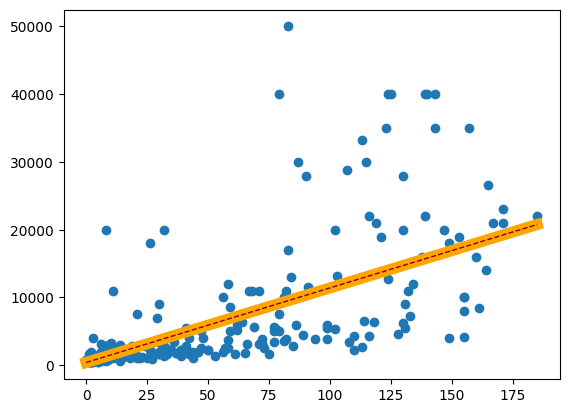

In [13]:
#グラフ化

#パラメータを使った１次関数
def calc(x):
    return p0 + p1 * x

#本塁打(X)の最小値～最大値の範囲で値を100個作成してリストに格納する
X_simu = np.linspace(X.min(), X.max(), 100)

#パラメータを使った1次関数による値
Y_simu = calc(X_simu)

#線形回帰モデルによる予測値
Y_prd2 = linear_model.predict(X_simu.reshape(-1,1))

#1次関数：赤い点線(予測値を描画してから描画する)、予測値：オレンジ、実際の値：青い散布図
plt.plot(X_simu, Y_prd2, color='orange', linewidth=8)
plt.plot(X_simu, Y_simu, color='darkred', linewidth=1, linestyle='dashed')
plt.scatter(X, Y)
plt.show()

### 目的変数を対数に変換してみる

次に、説明変数を加工してモデルの性能が上がるかどうか試す。
年収や価格などの「金額」については、対数で表したほうがモデルにフィットしやすい場合がある。
私たちが「年俸3000万円から5000万円へのアップ」と「年俸3億円から5億円へのアップ」を
似たようなインパクトで感じるのと共通性があるのかもしれない。

金額の差が反映されるようにプロットするのではなく、金額の比が反映されるように、金額を対数でプロットしてみる。

In [14]:
#推定年棒の対数
Y_log = np.log10(Y)

#推定年棒と推定年棒の対数を比較
print(Y[:5])
print(Y_log[:5])

[21000 19000 14000 11500 11000]
[4.32221929 4.2787536  4.14612804 4.06069784 4.04139269]


In [15]:
# データセットの分割（※Y_logを使用）
X_train, X_test, Y_train, Y_test = train_test_split(X, Y_log, test_size=0.3, random_state=0)
X_train, X_valid, Y_train, Y_valid = train_test_split(X_train, Y_train, test_size=0.3, random_state=0)

# モデルの作成～予測
log_model = LinearRegression()
log_model.fit(X_train, Y_train)
Y_pred = log_model.predict(X_valid)

In [16]:
# 対数から金額に戻す
Y_valid_org = np.power(10, Y_valid)
Y_pred_org = np.power(10, Y_pred)

# MSEを算出
log_model_mse = mean_squared_error(Y_valid_org, Y_pred_org)
print('MSE(1変数の線形回帰モデル～対数版):', log_model_mse)

MSE(1変数の線形回帰モデル～対数版): 82084765.30676235


対数でない通常のモデル（MSE:73842058.4514683）の方が性能が良かった。
グラフ化して先程のモデルと比較する。

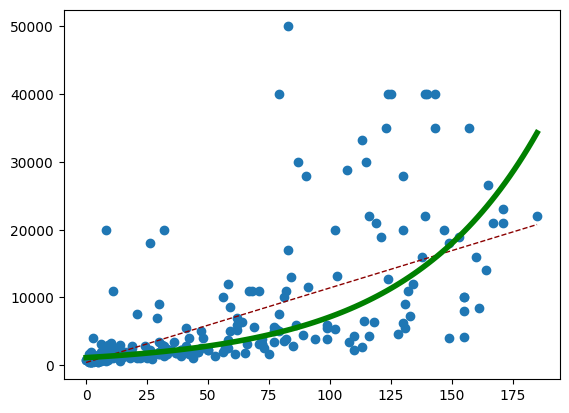

In [17]:
# 打点（X)の最小値～最大値の範囲で値を100個作成してリストに格納する
X_simu = np.linspace(X.min(), X.max(), 100)

# 線形回帰モデルによる予測値
Y_prd1 = linear_model.predict(X_simu.reshape(-1,1))
# 線形回帰モデル（対数版）による予測値
Y_prd2 = log_model.predict(X_simu.reshape(-1,1))
Y_prd2 = np.power(10, Y_prd2)

# １次関数：赤い点線、予測値：緑、実際の値：青い散布図
plt.plot(X_simu, Y_prd1, color='darkred', linewidth=1, linestyle='dashed')
plt.plot(X_simu, Y_prd2, color='green', linewidth=4, linestyle='solid')
plt.scatter(X, Y)
plt.show()

### 多項式モデル

パラメータの数が増えても、最適なパラメータは勾配降下法で求められる。
次数は自分で決められるが、増やしすぎると過学習となる可能性がある。
パラメータ数を変化させながらMSEを求め、適切なパラメータ数を求める。

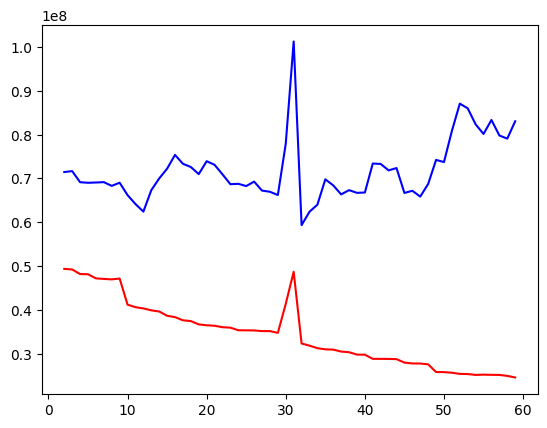

In [22]:
# MSEの結果を入れるリスト
mse_list_train = []
mse_list_valid = []

# 次元の範囲
degree = range(2, 60)

for i in degree:
    # i次元の多項式モデルを作成
    X3 = X.reshape(-1)
    X3 = np.stack([X3**j for j in range(1, i)], axis=1)

    # データセットの分割。X3を使っていることに注意
    X_train, X_test, Y_train, Y_test = train_test_split(X3, Y, test_size=0.2, random_state=0)
    X_train, X_valid, Y_train, Y_valid = train_test_split(X_train, Y_train, test_size=0.2, random_state=0)

    # モデルの作成～予測
    linear_model3 = LinearRegression()
    linear_model3.fit(X_train, Y_train)

    # 学習データに対する予測とMSEの算出
    Y_pred = linear_model3.predict(X_train)
    mse = mean_squared_error(Y_train, Y_pred)
    mse_list_train.append(mse)

    # 検証データに対する予測とMSEの算出
    Y_pred = linear_model3.predict(X_valid)
    mse = mean_squared_error(Y_valid, Y_pred)
    mse_list_valid.append(mse)

# グラフの描画
plt.plot(degree, mse_list_train, color="red")
plt.plot(degree, mse_list_valid, color="blue")
plt.show()

In [ ]:
赤線が学習データ、青線が検証データに対するMSEで、
学習データの方は、全体的に 右肩下がり でどこまでもMSEが小さくなっていく傾向が確認できる。
それに対して検証データの方は、30次元を過ぎたあたりから逆に、右肩上がり にMSEが増大してしまっているのが確認できます。